### Codigo para generar valores en X, hacer un histograma y despues una curva con los datos del histograma

In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
import numpy as np

In [2]:
Data = np.random.RandomState(10000) #ADUs
yData = Data.randn(10000) #lista con valores distribuidos de manera normal

In [11]:
yData #valores de los pixeles contenidos en un arreglo de 10 x 10

array([-1.27109064,  0.17613707, -0.29621638, ...,  0.66019026,
        0.53913786,  0.91287497])

In [12]:
yData.size

10000

In [13]:
xData=np.arange(0,10000)

In [14]:
xData #pixeles de un arreglo 100 x 100

array([   0,    1,    2, ..., 9997, 9998, 9999])

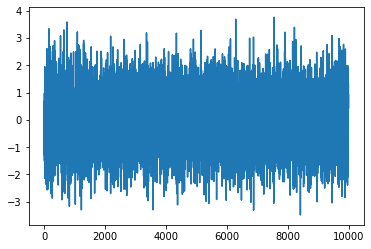

In [15]:
plt.plot(xData, yData)

In [16]:
### Creacion del histograma

In [17]:
bins=np.histogram_bin_edges(yData, bins='fd')

In [18]:
bins

array([-3.4832135 , -3.36045795, -3.23770241, -3.11494687, -2.99219132,
       -2.86943578, -2.74668024, -2.62392469, -2.50116915, -2.37841361,
       -2.25565806, -2.13290252, -2.01014697, -1.88739143, -1.76463589,
       -1.64188034, -1.5191248 , -1.39636926, -1.27361371, -1.15085817,
       -1.02810263, -0.90534708, -0.78259154, -0.65983599, -0.53708045,
       -0.41432491, -0.29156936, -0.16881382, -0.04605828,  0.07669727,
        0.19945281,  0.32220835,  0.4449639 ,  0.56771944,  0.69047499,
        0.81323053,  0.93598607,  1.05874162,  1.18149716,  1.3042527 ,
        1.42700825,  1.54976379,  1.67251933,  1.79527488,  1.91803042,
        2.04078597,  2.16354151,  2.28629705,  2.4090526 ,  2.53180814,
        2.65456368,  2.77731923,  2.90007477,  3.02283031,  3.14558586,
        3.2683414 ,  3.39109695,  3.51385249,  3.63660803,  3.75936358])

In [19]:
data_histo, bins = np.histogram(yData,bins=bins)        #np.histogram genera los datos en data_histo y los bins

In [20]:
data_histo # data_histo[0]: frecuencia u ocurrencia; data_histo[1]: bins

array([  1,   3,   2,   6,   7,   9,  13,  21,  28,  38,  58,  65,  65,
        86, 108, 115, 185, 207, 220, 264, 299, 378, 369, 439, 430, 456,
       494, 471, 482, 479, 476, 463, 437, 402, 359, 388, 296, 245, 204,
       182, 169, 127, 109,  86,  75,  50,  38,  21,  22,  13,  14,   3,
         8,   4,   4,   3,   1,   1,   2])

In [21]:
bins

array([-3.4832135 , -3.36045795, -3.23770241, -3.11494687, -2.99219132,
       -2.86943578, -2.74668024, -2.62392469, -2.50116915, -2.37841361,
       -2.25565806, -2.13290252, -2.01014697, -1.88739143, -1.76463589,
       -1.64188034, -1.5191248 , -1.39636926, -1.27361371, -1.15085817,
       -1.02810263, -0.90534708, -0.78259154, -0.65983599, -0.53708045,
       -0.41432491, -0.29156936, -0.16881382, -0.04605828,  0.07669727,
        0.19945281,  0.32220835,  0.4449639 ,  0.56771944,  0.69047499,
        0.81323053,  0.93598607,  1.05874162,  1.18149716,  1.3042527 ,
        1.42700825,  1.54976379,  1.67251933,  1.79527488,  1.91803042,
        2.04078597,  2.16354151,  2.28629705,  2.4090526 ,  2.53180814,
        2.65456368,  2.77731923,  2.90007477,  3.02283031,  3.14558586,
        3.2683414 ,  3.39109695,  3.51385249,  3.63660803,  3.75936358])

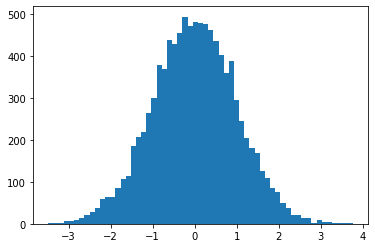

In [22]:
histograma=plt.hist(yData, bins=bins)# #plt.hist genera los datos del histograma, guarda los "datos,bins" y hace un plot

In [ ]:
histograma[0] #datos del histograma

In [ ]:
histograma[1] #bins del histograma

#### Ajustar una curva 

In [ ]:
print('Para ajustar una curva es necesario que ambos ejes sean del mismo tamaño\nsize datos= '+str(histograma[0].size)+'\n'+'size bins= '+str(histograma[1].size))

In [ ]:
print('max=  '+str(histograma[1].max()))
print('min= '+str(histograma[1].min()))
print('size= '+str(histograma[1].size))

In [ ]:
x=np.linspace(histograma[1].min(), histograma[1].max(), histograma[1].size)

In [ ]:
x.size


In [ ]:
plt.plot(x, 1 / np.sqrt(2*np.pi) * np.exp(-(x**2)/2), linewidth=4)

#### A pesar de que la curva ajusta a los datos, es necesario que la curva se genere a partir del histograma

## Combinar plots

In [23]:
yData #Valores de los pixeles en ADUs

array([-1.27109064,  0.17613707, -0.29621638, ...,  0.66019026,
        0.53913786,  0.91287497])

In [24]:
mu, std = norm.fit(yData)  #generar valores de la curva gaussiana

In [25]:
bins=np.histogram_bin_edges(yData, bins='fd')

In [28]:
data_histo, bins = np.histogram(yData,bins=bins)

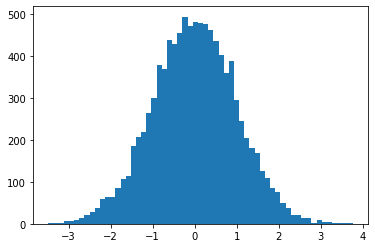

In [29]:
histograma=plt.hist(yData, bins) #, density=True) #, alpha=0.6, color='b') #Nuevamente: Generar solo histograma

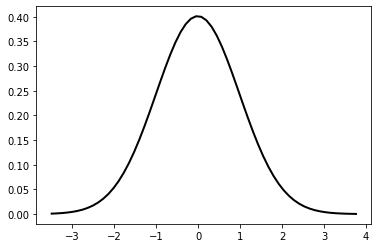

In [9]:
x=np.linspace(histograma[1].min(), histograma[1].max(), histograma[1].size) #Valores en x a partir del histograma
y = norm.pdf(x, mu, std) # generar valores de y, como la probabilidad de x
plt.plot(x, y, 'k', linewidth=2)

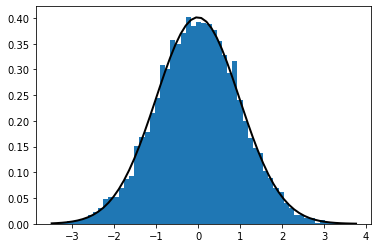

In [31]:
mu, std = norm.fit(yData)
histograma=plt.hist(yData, bins, density=True)#, alpha=0.6, color='b')
x=np.linspace(histograma[1].min(), histograma[1].max(), histograma[1].size)
y = norm.pdf(x, mu, std)
plt.plot(x, y, 'k', linewidth=2)